# Data cleaning of divvy bikes using python

### Preparation

#### 1. Importing library

In [84]:
pip install geopy

     |████████████████████████████████| 119 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 12.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [191]:
import geopy
import pandas as pd
import numpy as np

#### 2. Reading CSV data

In [ ]:
divvy202010 = pd.read_csv('~/Downloads/202010-divvy-tripdata.csv')
divvy202011 = pd.read_csv('~/Downloads/202011-divvy-tripdata.csv')
divvy202012 = pd.read_csv('~/Downloads/202012-divvy-tripdata.csv')
divvy202101 = pd.read_csv('~/Downloads/202101-divvy-tripdata.csv')
divvy202102 = pd.read_csv('~/Downloads/202102-divvy-tripdata.csv')
divvy202103 = pd.read_csv('~/Downloads/202103-divvy-tripdata.csv')
divvy202104 = pd.read_csv('~/Downloads/202104-divvy-tripdata.csv')
divvy202105 = pd.read_csv('~/Downloads/202105-divvy-tripdata.csv')
divvy202106 = pd.read_csv('~/Downloads/202106-divvy-tripdata.csv')
divvy202107 = pd.read_csv('~/Downloads/202107-divvy-tripdata.csv')
divvy202108 = pd.read_csv('~/Downloads/202108-divvy-tripdata.csv')
divvy202109 = pd.read_csv('~/Downloads/202109-divvy-tripdata.csv')
divvy202110 = pd.read_csv('~/Downloads/202110-divvy-tripdata.csv')
divvy202111 = pd.read_csv('~/Downloads/202111-divvy-tripdata.csv')
divvy202112 = pd.read_csv('~/Downloads/202112-divvy-tripdata.csv')
divvy202201 = pd.read_csv('~/Downloads/202201-divvy-tripdata.csv')
divvy202202 = pd.read_csv('~/Downloads/202202-divvy-tripdata.csv')
divvy202203 = pd.read_csv('~/Downloads/202203-divvy-tripdata.csv')
divvy202204 = pd.read_csv('~/Downloads/202204-divvy-tripdata.csv')
divvy202205 = pd.read_csv('~/Downloads/202205-divvy-tripdata.csv')
divvy202206 = pd.read_csv('~/Downloads/202206-divvy-tripdata.csv')
divvy202207 = pd.read_csv('~/Downloads/202207-divvy-tripdata.csv')
divvy202208 = pd.read_csv('~/Downloads/202208-divvy-tripdata.csv')
divvy202209 = pd.read_csv('~/Downloads/202209-divvy-publictripdata.csv')
divvy202210 = pd.read_csv('~/Downloads/202210-divvy-tripdata.csv')

In [96]:
# Import the os module
import os

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Print the type of the returned object
print("os.getcwd() returns an object of type: {0}".format(type(cwd)))

Current working directory: /Users/rolam/Downloads
os.getcwd() returns an object of type: <class 'str'>


#### 3. Aggregating the data into one dataframe

In [19]:
divvy2022 = pd.concat([divvy202201,divvy202202,divvy202203,divvy202204,
                       divvy202205,divvy202206,divvy202207,divvy202208,
                       divvy202209,divvy202210])

In [20]:
divvy2021 = pd.concat([divvy202101,divvy202102,divvy202103,divvy202104,
                       divvy202105,divvy202106,divvy202107,divvy202108,
                       divvy202109,divvy202110,divvy202111,divvy202112])

In [21]:
divvy2020 = pd.concat([divvy202010,divvy202011,divvy202012])

In [22]:
divvy_all = pd.concat([divvy2020,divvy2021,divvy2022])

#### 4. Checking number of null data

In [23]:
null_data = divvy_all.count()/len(divvy_all)
null_data

ride_id               1.000000
rideable_type         1.000000
started_at            1.000000
ended_at              1.000000
start_station_name    0.868972
start_station_id      0.868945
end_station_name      0.859231
end_station_id        0.859210
start_lat             1.000000
start_lng             1.000000
end_lat               0.999033
end_lng               0.999033
member_casual         1.000000
dtype: float64

In [26]:
divvy_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11523181 entries, 0 to 558684
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.2+ GB


#### 5. Inspecting the total of null data that we have, combination of empty start and end station name

In [136]:
empty_divvy = divvy_all[pd.isna(divvy_all.start_station_name)]

In [137]:
empty_divvy2 = divvy_all[pd.isna(divvy_all.end_station_name)]

In [138]:
empty_divvy_all = pd.concat([empty_divvy,empty_divvy2],axis=0)

In [139]:
empty_divvy_all_drop = empty_divvy_all.drop_duplicates(keep=False)

In [140]:
len(empty_divvy_all_drop)

1428600

In [141]:
len(empty_divvy_all)

3131966

In [142]:
empty_divvy_all_first = empty_divvy_all.drop_duplicates(keep="first")

In [144]:
Total_data_null = len(empty_divvy_all_first)/len(divvy_all)

In [145]:
Total_data_null

0.19788659051697619

#### 6. There is a duplicate in the ride id but the combination of the rest of the columns says that it is a different trip

In [128]:
sum(divvy_all.duplicated(subset=['ride_id']))

209

In [129]:
sum(divvy_all.duplicated(subset=['ride_id','started_at']))

0

### Data Cleaning

#### Problem 1: How to handle null data in the start and end station name

In [51]:
unique_start = pd.DataFrame(list(set(list(zip(empty_divvy.start_lat,empty_divvy.start_lng)))))

In [146]:
unique_end = pd.DataFrame(list(set(list(zip(empty_divvy2.end_lat,empty_divvy2.end_lng)))))

#Result: set does not remove duplicate tupple of NaN, so in unique_end data with NaN is still available

In [151]:
pd.isna(unique_end).sum()

0    11140
1    11140
dtype: int64

In [241]:
len(unique_end) - pd.isna(unique_end).sum()

0    1003
1    1003
dtype: int64

In [253]:
pd.isna(list(zip(empty_divvy2.end_lat,empty_divvy2.end_lng))).sum()

22280

In [287]:
unique_end2 = pd.DataFrame(unique_end.dropna()).reset_index()

In [269]:
len(unique_end2)

1003

#### Get the Station Table Data

In [155]:
table_station = pd.read_csv('~/Downloads/divvy_data/Divvy_Bicycle_Stations.csv')

In [371]:
table_station.head()

ID                             Station Name  Total Docks  \
0  1594046383808271024                   Troy St & Jackson Blvd            9   
1                  641      Central Park Ave & Bloomingdale Ave           11   
2  1683527931525155814      Public Rack - Cornell Ave & 87th Pl            1   
3                  367                     Racine Ave & 35th St           15   
4  1673852313397164648  Public Rack - Francisco Ave & Touhy Ave            2   

   Docks in Service      Status   Latitude  Longitude  \
0                 9  In Service  41.877505 -87.704850   
1                11  In Service  41.914166 -87.716755   
2                 1  In Service  41.736881 -87.583146   
3                15  In Service  41.830689 -87.656211   
4                 2  In Service  42.011865 -87.701317   

                                  Location  
0                   (41.877505, -87.70485)  
1                  (41.914166, -87.716755)  
2              (41.73688127, -87.58314552)  
3  (41.83068856472101, -87.65621066093445)  
4                  (42.011865, -87.701317)

#### Function to calculate the distance between lattitude and longitude

In [219]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    R = 3959.87433 # this is in miles.  For Earth radius in kilometers use 6372.8 km
    dLat = np.radians((lat2 - lat1))
    dLon = np.radians((lon2 - lon1))
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    a = np.sin(dLat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dLon/2)**2
    c = 2*np.arcsin(np.sqrt(a))
    
    return R * c

#### Process to fill in the start_id and start_name

In [327]:
new_df = pd.merge(unique_start, table_station,  how='cross')

In [285]:
new_df.dtypes

0                   float64
1                   float64
ID                    int64
Station Name         object
Total Docks           int64
Docks in Service      int64
Status               object
Latitude            float64
Longitude           float64
Location             object
dtype: object

In [328]:
new_df["distance"] = haversine((new_df[0]),(new_df[1]),(new_df["Latitude"]),(new_df["Longitude"]))

In [329]:
new_df_ = new_df.sort_values("distance").drop_duplicates([0,1], keep='first').reset_index()

In [351]:
print("number of data match that is more than 1 mile: ", len(new_df_[new_df_["distance"]>1]))
print("the maximum distance of the matched data: ",new_df_["distance"].max())

number of data match that is more than 1 mile:  36
the maximum distance of the matched data:  2.8125189906809682


In [332]:
new_df_ref = new_df_.drop(new_df_.columns[[0,5,6,7,10,11]],axis=1)
new_df_ref.head()

0          1   ID               Station Name   Latitude  Longitude
0  41.907655 -87.672552   61    Wood St & Milwaukee Ave  41.907655 -87.672552
1  41.648500 -87.546089  732    Hegewisch Metra Station  41.648501 -87.546090
2  41.867117 -87.641087   57  Clinton St & Roosevelt Rd  41.867118 -87.641088
3  41.910000 -87.670000   16    Paulina Ave & North Ave  41.909855 -87.669930
4  41.780000 -87.630000  390    Wentworth Ave & 63rd St  41.780080 -87.629746

#### Merge the approximated start station data with the whole trip data

In [411]:
divvy_all_fixed = divvy_all

In [412]:
divvy_all_fixed = pd.merge(divvy_all_fixed, new_df_ref,  how='left', left_on=['start_lat','start_lng'], right_on = [0,1])

In [413]:
#divvy_all_fixed.loc[pd.isna(divvy_all_fixed.start_station_name),"start_lat"] = divvy_all_fixed[pd.isna(divvy_all_fixed.start_station_name)]["Latitude"]
#divvy_all_fixed.loc[pd.isna(divvy_all_fixed.start_station_name),"start_lng"] = divvy_all_fixed[pd.isna(divvy_all_fixed.start_station_name)]["Longitude"]

In [414]:
divvy_all_fixed.loc[pd.isna(divvy_all_fixed.start_station_name),"start_station_name"] = divvy_all_fixed[pd.isna(divvy_all_fixed.start_station_name)]["Station Name"]

In [415]:
divvy_all_fixed.loc[pd.isna(divvy_all_fixed.start_station_id),"start_station_id"] = divvy_all_fixed[pd.isna(divvy_all_fixed.start_station_id)]["ID"]

In [416]:
divvy_all_fixed = divvy_all_fixed.drop(divvy_all_fixed.columns[[13,14,15,16,17,18]],axis=1)
divvy_all_fixed.head()

ride_id  rideable_type           started_at             ended_at  \
0  ACB6B40CF5B9044C  electric_bike  2020-10-31 19:39:43  2020-10-31 19:57:12   
1  DF450C72FD109C01  electric_bike  2020-10-31 23:50:08  2020-11-01 00:04:16   
2  B6396B54A15AC0DF  electric_bike  2020-10-31 23:00:01  2020-10-31 23:08:22   
3  44A4AEE261B9E854  electric_bike  2020-10-31 22:16:43  2020-10-31 22:19:35   
4  10B7DD76A6A2EB95  electric_bike  2020-10-31 19:38:19  2020-10-31 19:54:32   

               start_station_name start_station_id  \
0   Lakeview Ave & Fullerton Pkwy            313.0   
1    Southport Ave & Waveland Ave            227.0   
2      Stony Island Ave & 67th St            102.0   
3             Clark St & Grace St            165.0   
4  Southport Ave & Wrightwood Ave            190.0   

             end_station_name end_station_id  start_lat  start_lng    end_lat  \
0        Rush St & Hubbard St          125.0  41.926101 -87.638977  41.890345   
1  Kedzie Ave & Milwaukee Ave          260.0  41.948172 -87.663911  41.929528   
2    University Ave & 57th St          423.0  41.773462 -87.585372  41.791455   
3      Broadway & Sheridan Rd          256.0  41.950855 -87.659244  41.952809   
4     Stave St & Armitage Ave          185.0  41.928857 -87.663962  41.917777   

     end_lng member_casual  
0 -87.626068        casual  
1 -87.707818        casual  
2 -87.600050        casual  
3 -87.650103        casual  
4 -87.691434        casual

#### Process for filling in the the end station id and name

In [294]:
new_df2 = pd.merge(unique_end2, table_station,  how='cross')

In [295]:
new_df2["distance"] = haversine((new_df2[0]),(new_df2[1]),(new_df2["Latitude"]),(new_df2["Longitude"]))

In [298]:
new_df_2 = new_df2.sort_values("distance").drop_duplicates([0,1], keep='first').reset_index()

In [356]:
print("number of data match that is more than 1 mile: ", len(new_df_2[new_df_2["distance"]>1])/len(new_df_2))
coba = (new_df_2[new_df_2["distance"]>1]["distance"])

number of data match that is more than 1 mile:  0.3230309072781655


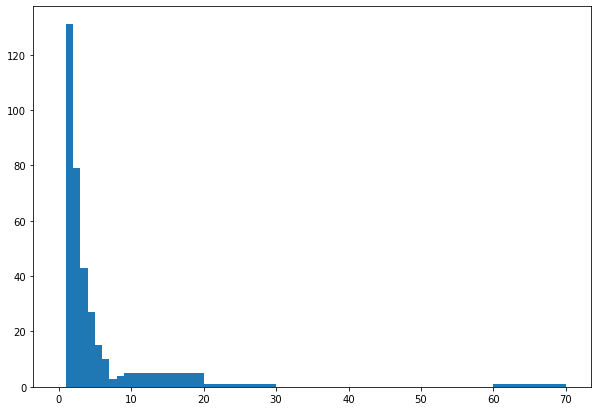

In [360]:
from matplotlib import pyplot as plt
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(coba, bins = [0, 1, 2,3,4,5,6,7,8,9,10, 20,30,40,50,60,70])
 
# Show plot
plt.show()

In [275]:
new_df_ref2 = new_df_2.drop(new_df_2.columns[[0,5,6,7,10,11]],axis=1)
new_df_ref2.head()

0      1                   ID                           Station Name  \
0  41.91 -87.67                   16                Paulina Ave & North Ave   
1  41.78 -87.63                  390                Wentworth Ave & 63rd St   
2  41.88 -87.77  1674190492950080346  Public Rack - Menard Ave & Madison St   
3  41.83 -87.67                  369                      Wood St & 35th St   
4  41.73 -87.55  1674190346921192048    Public Rack - Houston Ave & 91st St   

    Latitude  Longitude  
0  41.909855 -87.669930  
1  41.780080 -87.629746  
2  41.880021 -87.770325  
3  41.830105 -87.670298  
4  41.729964 -87.549645

#### Merge the approximated End station data with the whole trip data

In [417]:
divvy_all_fixed = pd.merge(divvy_all_fixed, new_df_ref2,  how='left', left_on=['end_lat','end_lng'], right_on = [0,1])

In [418]:
divvy_all_fixed.loc[pd.isna(divvy_all_fixed.end_station_name),"end_station_name"] = divvy_all_fixed[pd.isna(divvy_all_fixed.end_station_name)]["Station Name"]

In [419]:
divvy_all_fixed.loc[pd.isna(divvy_all_fixed.end_station_id),"end_station_id"] = divvy_all_fixed[pd.isna(divvy_all_fixed.end_station_id)]["ID"]

In [420]:
divvy_all_fixed = divvy_all_fixed.drop(divvy_all_fixed.columns[[13,14,15,16,17,18]],axis=1)
divvy_all_fixed.head()

ride_id  rideable_type           started_at             ended_at  \
0  ACB6B40CF5B9044C  electric_bike  2020-10-31 19:39:43  2020-10-31 19:57:12   
1  DF450C72FD109C01  electric_bike  2020-10-31 23:50:08  2020-11-01 00:04:16   
2  B6396B54A15AC0DF  electric_bike  2020-10-31 23:00:01  2020-10-31 23:08:22   
3  44A4AEE261B9E854  electric_bike  2020-10-31 22:16:43  2020-10-31 22:19:35   
4  10B7DD76A6A2EB95  electric_bike  2020-10-31 19:38:19  2020-10-31 19:54:32   

               start_station_name start_station_id  \
0   Lakeview Ave & Fullerton Pkwy            313.0   
1    Southport Ave & Waveland Ave            227.0   
2      Stony Island Ave & 67th St            102.0   
3             Clark St & Grace St            165.0   
4  Southport Ave & Wrightwood Ave            190.0   

             end_station_name end_station_id  start_lat  start_lng    end_lat  \
0        Rush St & Hubbard St          125.0  41.926101 -87.638977  41.890345   
1  Kedzie Ave & Milwaukee Ave          260.0  41.948172 -87.663911  41.929528   
2    University Ave & 57th St          423.0  41.773462 -87.585372  41.791455   
3      Broadway & Sheridan Rd          256.0  41.950855 -87.659244  41.952809   
4     Stave St & Armitage Ave          185.0  41.928857 -87.663962  41.917777   

     end_lng member_casual  
0 -87.626068        casual  
1 -87.707818        casual  
2 -87.600050        casual  
3 -87.650103        casual  
4 -87.691434        casual

#### Check the filtered data from problem 1 and drop the remaining NaN data

In [422]:
divvy_all_temp = divvy_all_fixed
divvy_all_fixed = divvy_all_temp.dropna()

In [423]:
null_data = divvy_all_fixed.count()/len(divvy_all_fixed)

null_data

ride_id               1.0
rideable_type         1.0
started_at            1.0
ended_at              1.0
start_station_name    1.0
start_station_id      1.0
end_station_name      1.0
end_station_id        1.0
start_lat             1.0
start_lng             1.0
end_lat               1.0
end_lng               1.0
member_casual         1.0
dtype: float64

In [426]:
data_retained = divvy_all_fixed.count()/len(divvy_all)

data_retained

ride_id               0.999033
rideable_type         0.999033
started_at            0.999033
ended_at              0.999033
start_station_name    0.999033
start_station_id      0.999033
end_station_name      0.999033
end_station_id        0.999033
start_lat             0.999033
start_lng             0.999033
end_lat               0.999033
end_lng               0.999033
member_casual         0.999033
dtype: float64

#### Problem 2: How to add zipcode data to the table

#### Function get_zipcode

In [441]:
geolocator = geopy.Nominatim(user_agent="check_1")

#def get_zip_code(x):
#    location = geolocator.reverse("{}, {}".format(x['start_lat'],x['start_lng']))
#    return location.raw['address']

def get_zipcode(df, geolocator, lat_field, lon_field):
    try:
        location = geolocator.reverse((df[lat_field], df[lon_field]))
        return location.raw['address']['postcode']
    except (AttributeError, KeyError, ValueError):
        print(df[lat_field], df[lon_field])
        return None



geolocator = geopy.Nominatim(user_agent='myusername') #My OpenMap username

#### Comparison of unique station name of the station table and trip table

In [461]:
print("number of station in the trip data: ", len(divvy_all_fixed.start_station_name.unique()))
print("number of station in the station data: ", len(table_station))

number of station in the trip data:  1739
number of station in the station data:  1419


#### Assigning zip code to the station table

In [462]:
table_station["zipcodes"] = table_station.apply(
    get_zipcode, axis=1, geolocator=geolocator, 
    lat_field='Latitude', lon_field='Longitude')

41.830777 -87.632504
41.875932666 -87.630584536


In [467]:
table_station.loc[table_station.Latitude == 41.830777,"zipcodes"] = 60609
table_station.loc[table_station.Latitude == 41.875932666,"zipcodes"] = 60605

In [476]:
table_station.head()

ID                             Station Name  Total Docks  \
0  1594046383808271024                   Troy St & Jackson Blvd            9   
1                  641      Central Park Ave & Bloomingdale Ave           11   
2  1683527931525155814      Public Rack - Cornell Ave & 87th Pl            1   
3                  367                     Racine Ave & 35th St           15   
4  1673852313397164648  Public Rack - Francisco Ave & Touhy Ave            2   

   Docks in Service      Status   Latitude  Longitude  \
0                 9  In Service  41.877505 -87.704850   
1                11  In Service  41.914166 -87.716755   
2                 1  In Service  41.736881 -87.583146   
3                15  In Service  41.830689 -87.656211   
4                 2  In Service  42.011865 -87.701317   

                                  Location zipcodes  
0                   (41.877505, -87.70485)    60612  
1                  (41.914166, -87.716755)    60647  
2              (41.73688127, -87.58314552)    60617  
3  (41.83068856472101, -87.65621066093445)    60609  
4                  (42.011865, -87.701317)    60645

#### Getting the list of unique station from the trip table

In [474]:
unique_station_trip = pd.DataFrame(divvy_all_fixed.start_station_name.unique())

In [475]:
unique_station_trip.head()

0
0   Lakeview Ave & Fullerton Pkwy
1    Southport Ave & Waveland Ave
2      Stony Island Ave & 67th St
3             Clark St & Grace St
4  Southport Ave & Wrightwood Ave

#### New station table from historical data

In [484]:
additional_station_table = pd.read_csv('~/Downloads/divvy_data/Divvy_Bicycle_Stations_-_Historical.csv')

In [485]:
additional_station_table.head()

ID               Timestamp  \
0                  643  09/01/2022 12:05:19 AM   
1                  148  09/01/2022 12:05:19 AM   
2  1674190462885309230  09/01/2022 12:05:19 AM   
3                  628  09/01/2022 12:05:19 AM   
4                  100  09/01/2022 12:05:19 AM   

                          Station Name  Address  Total Docks  \
0                           Smith Park      NaN           15   
1                   State St & 33rd St      NaN           15   
2                            Lowe Park      NaN            2   
3                           Walsh Park      NaN           23   
4  Orleans St & Merchandise Mart Plaza      NaN           35   

   Docks in Service  Available Docks  Available Bikes  Percent Full  \
0                14               11                3            21   
1                14               13                1             7   
2                 2                2                0             0   
3                16               11                5            31   
4                30               29                1             3   

       Status   Latitude  Longitude                      Location  \
0  In Service  41.892048 -87.689397  POINT (-87.689397 41.892048)   
1  In Service  41.834734 -87.625813  POINT (-87.625813 41.834734)   
2  In Service  41.799605 -87.641464  POINT (-87.641464 41.799605)   
3  In Service  41.914610 -87.667968   POINT (-87.667968 41.91461)   
4  In Service  41.888243 -87.636390   POINT (-87.63639 41.888243)   

                              Record  
0                  64320220901000519  
1                  14820220901000519  
2  167419046288530923020220901000519  
3                  62820220901000519  
4                  10020220901000519

In [487]:
additional_station_table_ref = additional_station_table.sort_values("Timestamp").drop_duplicates(["Station Name"], 
                                                                                                 keep='first').reset_index()

In [488]:
len(additional_station_table_ref)

1718

#### Merging Trial 1

In [477]:
station_table_merged = pd.merge(unique_station_trip, table_station,  how='outer', 
                                left_on=[0], right_on = ["Station Name"])

In [479]:
len(station_table_merged) #this data is 434 more from the station table
#that means there are 434 new station that is not listed

1853

In [673]:
station_table_merged.head()

0     ID                    Station Name  \
0   Lakeview Ave & Fullerton Pkwy  313.0   Lakeview Ave & Fullerton Pkwy   
1    Southport Ave & Waveland Ave  227.0    Southport Ave & Waveland Ave   
2      Stony Island Ave & 67th St  102.0      Stony Island Ave & 67th St   
3             Clark St & Grace St  165.0             Clark St & Grace St   
4  Southport Ave & Wrightwood Ave  190.0  Southport Ave & Wrightwood Ave   

   Total Docks  Docks in Service      Status   Latitude  Longitude  \
0         19.0              19.0  In Service  41.925858 -87.638973   
1         23.0              23.0  In Service  41.948150 -87.663940   
2         11.0              11.0  In Service  41.773458 -87.585340   
3         23.0              23.0  In Service  41.950780 -87.659172   
4         15.0              15.0  In Service  41.928773 -87.663913   

                           Location zipcodes  
0           (41.925858, -87.638973)    60614  
1             (41.94815, -87.66394)    60613  
2  (41.77345849948, -87.5853397391)    60619  
3            (41.95078, -87.659172)    60613  
4           (41.928773, -87.663913)    60614

#### Merging Trial 2

In [686]:
station_table_merged_2 = pd.merge(unique_station_trip, additional_station_table_ref,  
                                  how='outer', left_on=[0], right_on = ["Station Name"])

In [523]:
number_trip = divvy_all_fixed.groupby(["start_station_name"]).count()["ride_id"]

In [521]:
number_trip = pd.DataFrame(number_trip).reset_index()

In [687]:
station_table_merged_2 = pd.merge(station_table_merged_2, number_trip,  
                                  how='outer', left_on=[0], right_on = ["start_station_name"])

In [688]:
station_table_merged_2.head()

0     index     ID               Timestamp  \
0   Lakeview Ave & Fullerton Pkwy  108733.0  313.0  09/01/2022 01:05:02 PM   
1    Southport Ave & Waveland Ave  108641.0  227.0  09/01/2022 01:05:02 PM   
2      Stony Island Ave & 67th St  107775.0  102.0  09/01/2022 01:05:02 PM   
3             Clark St & Grace St  108007.0  165.0  09/01/2022 01:05:02 PM   
4  Southport Ave & Wrightwood Ave  108600.0  190.0  09/01/2022 01:05:02 PM   

                     Station Name  Address  Total Docks  Docks in Service  \
0   Lakeview Ave & Fullerton Pkwy      NaN         19.0              19.0   
1    Southport Ave & Waveland Ave      NaN         23.0              20.0   
2      Stony Island Ave & 67th St      NaN         11.0              11.0   
3             Clark St & Grace St      NaN         23.0              23.0   
4  Southport Ave & Wrightwood Ave      NaN         15.0              15.0   

   Available Docks  Available Bikes  Percent Full      Status   Latitude  \
0             17.0              2.0          11.0  In Service  41.925858   
1              6.0             14.0          70.0  In Service  41.948150   
2              8.0              3.0          27.0  In Service  41.773458   
3             16.0              7.0          30.0  In Service  41.950780   
4             12.0              3.0          20.0  In Service  41.928773   

   Longitude                               Location             Record  \
0 -87.638973           POINT (-87.638973 41.925858)  31320220901130502   
1 -87.663940             POINT (-87.66394 41.94815)  22720220901130502   
2 -87.585340  POINT (-87.5853397391 41.77345849948)  10220220901130502   
3 -87.659172            POINT (-87.659172 41.95078)  16520220901130502   
4 -87.663913           POINT (-87.663913 41.928773)  19020220901130502   

   ride_id  
0  49888.0  
1  39495.0  
2    965.0  
3  51867.0  
4  25727.0

#### Handling unidentified station

In [525]:
unidentified_station = pd.DataFrame(station_table_merged_2[pd.isna(station_table_merged_2["Station Name"])])

In [527]:
potential_loss_data = unidentified_station["ride_id"].sum()

In [529]:
unidentified_station.sort_values(["ride_id"],ascending = False).head()

0  index  ID Timestamp Station Name  Address  \
116         Morgan St & Lake St    NaN NaN       NaN          NaN      NaN   
64    Lake Shore Dr & Monroe St    NaN NaN       NaN          NaN      NaN   
28    Bissell St & Armitage Ave    NaN NaN       NaN          NaN      NaN   
269      Green St & Randolph St    NaN NaN       NaN          NaN      NaN   
138  Lake Shore Dr & North Blvd    NaN NaN       NaN          NaN      NaN   

     Total Docks  Docks in Service  Available Docks  Available Bikes  \
116          NaN               NaN              NaN              NaN   
64           NaN               NaN              NaN              NaN   
28           NaN               NaN              NaN              NaN   
269          NaN               NaN              NaN              NaN   
138          NaN               NaN              NaN              NaN   

     Percent Full Status  Latitude  Longitude Location Record  ride_id  
116           NaN    NaN       NaN        NaN      NaN    NaN  31868.0  
64            NaN    NaN       NaN        NaN      NaN    NaN  30638.0  
28            NaN    NaN       NaN        NaN      NaN    NaN  30230.0  
269           NaN    NaN       NaN        NaN      NaN    NaN  28481.0  
138           NaN    NaN       NaN        NaN      NaN    NaN  27943.0

In [530]:
from difflib import SequenceMatcher

In [532]:
unidentified_station_name = unidentified_station[0].reset_index()
unidentified_station_name

index                                       0
0       17                  WATSON TESTING - DIVVY
1       28               Bissell St & Armitage Ave
2       43                   Broadway & Wilson Ave
3       55             Lake Shore Dr & Belmont Ave
4       64               Lake Shore Dr & Monroe St
..     ...                                     ...
162   1619                Elizabeth St & Fulton St
163   1637    Public Rack - Prairie Ave & 47th St 
164   1639  Public Rack - Pulaski Rd &amp; 65th St
165   1650                Eastlake Ter & Howard St
166   1738      Campbell Ave & Montrose Ave (Temp)

[167 rows x 2 columns]

In [548]:
new_df_ustation = pd.merge(unidentified_station_name, additional_station_table_ref,  how='cross')
new_df_ustation_ref = pd.DataFrame(new_df_ustation.iloc[:,[1,5]])

In [588]:
new_df_ustation_ref["similarity"] = [SequenceMatcher(a = a, b = b).ratio() 
                                      for a, b in zip(new_df_ustation_ref[0], new_df_ustation_ref["Station Name"])]
#new_df_ustation_ref[0].apply(lambda e: SequenceMatcher(None, email, e).ratio())
#SequenceMatcher(a=new_df_ustation_ref[0], b=new_df_ustation_ref[1]).ratio()

In [563]:
new_df_ustation_ref.head()

0                                       Station Name  \
0  WATSON TESTING - DIVVY               Public Rack - Stony Island & 87th St   
1  WATSON TESTING - DIVVY                             Broadway & Belmont Ave   
2  WATSON TESTING - DIVVY                               Broadway & Argyle St   
3  WATSON TESTING - DIVVY                              Broadway & Berwyn Ave   
4  WATSON TESTING - DIVVY  Broadway & Wilson - Truman College Vaccination...   

   similarity  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

In [589]:
new_df_ustation_sort = new_df_ustation_ref.sort_values(["similarity"],ascending = False).drop_duplicates([0],keep = 'first')

In [609]:
new_df_ustation_sort[new_df_ustation_sort.similarity>0.8].sort_values(["similarity"])
#determining the threshold of the similarity between the station name

0  \
99060             Spaulding Ave & Bryn Mawr Ave   
78443             Spaulding Ave & Evergreen Ave   
250271            Pullman - Ross Dress for Less   
65763      Bissell St & Armitage Ave - Charging   
207945               California Ave & Ogden Ave   
...                                         ...   
17657                    Green St & Randolph St   
19361                   Lincoln Ave & Roscoe St   
2197                  Bissell St & Armitage Ave   
281545     Public Rack - Prairie Ave & 47th St    
246419  Public Rack - Rockwell Ave & Touhy Ave    

                                       Station Name  similarity  
99060   Public Rack - Spaulding Ave & Bryn Mawr Ave    0.805556  
78443   Public Rack - Spaulding Ave & Evergreen Ave    0.805556  
250271  Public Rack - Pullman - Ross Dress for Less    0.805556  
65763                    Bissell St & Armitage Ave*    0.806452  
207945                   California Ave & North Ave    0.807692  
...                                             ...         ...  
17657                       Green St & Randolph St*    0.977778  
19361                      Lincoln Ave & Roscoe St*    0.978723  
2197                     Bissell St & Armitage Ave*    0.980392  
281545          Public Rack - Prairie Ave & 47th St    0.985915  
246419       Public Rack - Rockwell Ave & Touhy Ave    0.987013  

[119 rows x 3 columns]

In [628]:
new_df_ustation_sort.to_csv('file_name.csv')
#save file to csv for manual inspection
#get 61 additional station data

In [635]:
alt_ustation = pd.read_csv('file_name.csv')

In [637]:
alt_ustation = alt_ustation[alt_ustation.Select == 1].iloc[:,[1,2]]

In [641]:
alt_ustation.head()

0  \
0  Public Rack - Rockwell Ave & Touhy Ave    
1     Public Rack - Prairie Ave & 47th St    
2                Bissell St & Armitage Ave   
3                  Lincoln Ave & Roscoe St   
4                   Green St & Randolph St   

                             Station Name  
0  Public Rack - Rockwell Ave & Touhy Ave  
1     Public Rack - Prairie Ave & 47th St  
2              Bissell St & Armitage Ave*  
3                Lincoln Ave & Roscoe St*  
4                 Green St & Randolph St*

#### Merge Trial 3

In [649]:
unidentified_station_2 = pd.merge(unidentified_station, alt_ustation,  
                                  how='left', left_on=[0], right_on = ["0"]).iloc[:,[0,16,18]]

In [650]:
#number of trip with unidentified station in station table
unidentified_station_2[pd.isna(unidentified_station_2["Station Name_y"])].ride_id.sum()/station_table_merged_2.ride_id.sum()

0.006992330899446936

In [652]:
#number of trip data from all unidentified station
unidentified_station_2.ride_id.sum()/station_table_merged_2.ride_id.sum()

0.0237100441181542

In [691]:
unidentified_station_2.rename(columns = {0:'new_one', 'Station Name_y':'app_stat'}, inplace = True)
unidentified_station_2.head()

new_one  ride_id                             app_stat
0       WATSON TESTING - DIVVY    780.0                                  NaN
1    Bissell St & Armitage Ave  30230.0           Bissell St & Armitage Ave*
2        Broadway & Wilson Ave   2799.0                                  NaN
3  Lake Shore Dr & Belmont Ave  14222.0  DuSable Lake Shore Dr & Belmont Ave
4    Lake Shore Dr & Monroe St  30638.0    DuSable Lake Shore Dr & Monroe St

In [694]:
station_table_merged_3 = pd.merge(station_table_merged_2, unidentified_station_2,  
                                  how='left', left_on=[0], right_on = ["new_one"])

In [727]:
print(len(station_table_merged_3))
station_table_merged_3.head()

1885


0     index     ID               Timestamp  \
0   Lakeview Ave & Fullerton Pkwy  108733.0  313.0  09/01/2022 01:05:02 PM   
1    Southport Ave & Waveland Ave  108641.0  227.0  09/01/2022 01:05:02 PM   
2      Stony Island Ave & 67th St  107775.0  102.0  09/01/2022 01:05:02 PM   
3             Clark St & Grace St  108007.0  165.0  09/01/2022 01:05:02 PM   
4  Southport Ave & Wrightwood Ave  108600.0  190.0  09/01/2022 01:05:02 PM   

                     Station Name  Address  Total Docks  Docks in Service  \
0   Lakeview Ave & Fullerton Pkwy      NaN         19.0              19.0   
1    Southport Ave & Waveland Ave      NaN         23.0              20.0   
2      Stony Island Ave & 67th St      NaN         11.0              11.0   
3             Clark St & Grace St      NaN         23.0              23.0   
4  Southport Ave & Wrightwood Ave      NaN         15.0              15.0   

   Available Docks  Available Bikes  Percent Full      Status   Latitude  \
0             17.0              2.0          11.0  In Service  41.925858   
1              6.0             14.0          70.0  In Service  41.948150   
2              8.0              3.0          27.0  In Service  41.773458   
3             16.0              7.0          30.0  In Service  41.950780   
4             12.0              3.0          20.0  In Service  41.928773   

   Longitude                               Location             Record  \
0 -87.638973           POINT (-87.638973 41.925858)  31320220901130502   
1 -87.663940             POINT (-87.66394 41.94815)  22720220901130502   
2 -87.585340  POINT (-87.5853397391 41.77345849948)  10220220901130502   
3 -87.659172            POINT (-87.659172 41.95078)  16520220901130502   
4 -87.663913           POINT (-87.663913 41.928773)  19020220901130502   

   ride_id_x new_one  ride_id_y app_stat  
0    49888.0     NaN        NaN      NaN  
1    39495.0     NaN        NaN      NaN  
2      965.0     NaN        NaN      NaN  
3    51867.0     NaN        NaN      NaN  
4    25727.0     NaN        NaN      NaN

In [685]:
station_table_merged_2 = pd.merge(station_table_merged_2, station_table_merged,  
                                  how='left', left_on=[0], right_on = [0])

In [703]:
station_table_merged_3.loc[pd.notna(station_table_merged_3["app_stat"]),"Station Name"] = station_table_merged_3.loc[pd.notna(station_table_merged_3["app_stat"]), "app_stat"]

#### Merge Table 4

In [760]:
station_table_merged_4 = pd.DataFrame(station_table_merged_3[[0,"Station Name"]])
print(len(station_table_merged_4))
station_table_merged_4.rename(columns = {0:'new_one'}, inplace = True)
station_table_merged_4.loc[pd.isna(station_table_merged_4["Station Name"]),"Station Name"] = "Not Found"
station_table_merged_4.head()

1885


new_one                    Station Name
0   Lakeview Ave & Fullerton Pkwy   Lakeview Ave & Fullerton Pkwy
1    Southport Ave & Waveland Ave    Southport Ave & Waveland Ave
2      Stony Island Ave & 67th St      Stony Island Ave & 67th St
3             Clark St & Grace St             Clark St & Grace St
4  Southport Ave & Wrightwood Ave  Southport Ave & Wrightwood Ave

#### Merge Table 5

In [762]:
station_table_merged_5 = pd.merge(station_table_merged_4, station_table_merged_2,  
                                  how='left', left_on=["Station Name"], right_on = ["Station Name"])

In [763]:
print(len(station_table_merged_4))
print(len(station_table_merged_2))
print(len(station_table_merged_5))
station_table_merged_5.head()

1885
1885
1885


new_one                    Station Name  \
0   Lakeview Ave & Fullerton Pkwy   Lakeview Ave & Fullerton Pkwy   
1    Southport Ave & Waveland Ave    Southport Ave & Waveland Ave   
2      Stony Island Ave & 67th St      Stony Island Ave & 67th St   
3             Clark St & Grace St             Clark St & Grace St   
4  Southport Ave & Wrightwood Ave  Southport Ave & Wrightwood Ave   

                                0     index     ID               Timestamp  \
0   Lakeview Ave & Fullerton Pkwy  108733.0  313.0  09/01/2022 01:05:02 PM   
1    Southport Ave & Waveland Ave  108641.0  227.0  09/01/2022 01:05:02 PM   
2      Stony Island Ave & 67th St  107775.0  102.0  09/01/2022 01:05:02 PM   
3             Clark St & Grace St  108007.0  165.0  09/01/2022 01:05:02 PM   
4  Southport Ave & Wrightwood Ave  108600.0  190.0  09/01/2022 01:05:02 PM   

   Address  Total Docks  Docks in Service  Available Docks  Available Bikes  \
0      NaN         19.0              19.0             17.0              2.0   
1      NaN         23.0              20.0              6.0             14.0   
2      NaN         11.0              11.0              8.0              3.0   
3      NaN         23.0              23.0             16.0              7.0   
4      NaN         15.0              15.0             12.0              3.0   

   Percent Full      Status   Latitude  Longitude  \
0          11.0  In Service  41.925858 -87.638973   
1          70.0  In Service  41.948150 -87.663940   
2          27.0  In Service  41.773458 -87.585340   
3          30.0  In Service  41.950780 -87.659172   
4          20.0  In Service  41.928773 -87.663913   

                                Location             Record  ride_id  
0           POINT (-87.638973 41.925858)  31320220901130502  49888.0  
1             POINT (-87.66394 41.94815)  22720220901130502  39495.0  
2  POINT (-87.5853397391 41.77345849948)  10220220901130502    965.0  
3            POINT (-87.659172 41.95078)  16520220901130502  51867.0  
4           POINT (-87.663913 41.928773)  19020220901130502  25727.0

#### Merge Table 6

In [764]:
station_table_merged_6 = pd.merge(station_table_merged_5, station_table_merged,  
                                  how='left', left_on=["Station Name"], right_on = ["Station Name"])

In [765]:
print(len(station_table_merged_6))
print(len(station_table_merged))
station_table_merged_6.head()

1885
1853


new_one                    Station Name  \
0   Lakeview Ave & Fullerton Pkwy   Lakeview Ave & Fullerton Pkwy   
1    Southport Ave & Waveland Ave    Southport Ave & Waveland Ave   
2      Stony Island Ave & 67th St      Stony Island Ave & 67th St   
3             Clark St & Grace St             Clark St & Grace St   
4  Southport Ave & Wrightwood Ave  Southport Ave & Wrightwood Ave   

                              0_x     index   ID_x               Timestamp  \
0   Lakeview Ave & Fullerton Pkwy  108733.0  313.0  09/01/2022 01:05:02 PM   
1    Southport Ave & Waveland Ave  108641.0  227.0  09/01/2022 01:05:02 PM   
2      Stony Island Ave & 67th St  107775.0  102.0  09/01/2022 01:05:02 PM   
3             Clark St & Grace St  108007.0  165.0  09/01/2022 01:05:02 PM   
4  Southport Ave & Wrightwood Ave  108600.0  190.0  09/01/2022 01:05:02 PM   

   Address  Total Docks_x  Docks in Service_x  Available Docks  ...  ride_id  \
0      NaN           19.0                19.0             17.0  ...  49888.0   
1      NaN           23.0                20.0              6.0  ...  39495.0   
2      NaN           11.0                11.0              8.0  ...    965.0   
3      NaN           23.0                23.0             16.0  ...  51867.0   
4      NaN           15.0                15.0             12.0  ...  25727.0   

                              0_y   ID_y  Total Docks_y  Docks in Service_y  \
0   Lakeview Ave & Fullerton Pkwy  313.0           19.0                19.0   
1    Southport Ave & Waveland Ave  227.0           23.0                23.0   
2      Stony Island Ave & 67th St  102.0           11.0                11.0   
3             Clark St & Grace St  165.0           23.0                23.0   
4  Southport Ave & Wrightwood Ave  190.0           15.0                15.0   

     Status_y Latitude_y  Longitude_y                        Location_y  \
0  In Service  41.925858   -87.638973           (41.925858, -87.638973)   
1  In Service  41.948150   -87.663940             (41.94815, -87.66394)   
2  In Service  41.773458   -87.585340  (41.77345849948, -87.5853397391)   
3  In Service  41.950780   -87.659172            (41.95078, -87.659172)   
4  In Service  41.928773   -87.663913           (41.928773, -87.663913)   

   zipcodes  
0     60614  
1     60613  
2     60619  
3     60613  
4     60614  

[5 rows x 27 columns]

In [766]:
station_table_merged_6.columns

Index(['new_one', 'Station Name', '0_x', 'index', 'ID_x', 'Timestamp',
       'Address', 'Total Docks_x', 'Docks in Service_x', 'Available Docks',
       'Available Bikes', 'Percent Full', 'Status_x', 'Latitude_x',
       'Longitude_x', 'Location_x', 'Record', 'ride_id', '0_y', 'ID_y',
       'Total Docks_y', 'Docks in Service_y', 'Status_y', 'Latitude_y',
       'Longitude_y', 'Location_y', 'zipcodes'],
      dtype='object')

#### Merge Table 7

In [770]:
station_table_merged_7 = pd.DataFrame(station_table_merged_6[['new_one', 'Station Name', 'Timestamp',
       'Address', 'Total Docks_x', 'Docks in Service_x', 'Available Docks',
       'Available Bikes', 'Percent Full', 'Status_x', 'Latitude_x',
       'Longitude_x', 'Location_x', 'zipcodes']])

#### Finding zipcode 2

In [772]:
withoutzipcodes = station_table_merged_7[pd.isna(station_table_merged_7.zipcodes)]
withlatlong = withoutzipcodes[pd.notna(withoutzipcodes.Latitude_x)]

In [776]:
withlatlong.loc[:,"zipcodes"] = withlatlong.apply(
    get_zipcode, axis=1, geolocator=geolocator, 
    lat_field='Latitude_x', lon_field='Longitude_x')

/var/folders/qw/g7lmpvlx2255lnn211m1tnp00000gn/T/ipykernel_6973/1112887275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  withlatlong.loc[:,"zipcodes"] = withlatlong.apply(


In [782]:
withlatlong2 = pd.DataFrame(withlatlong).reset_index()[["Station Name","zipcodes"]]

In [783]:
withlatlong2.head()

Station Name zipcodes
0        Halsted St & 63rd St    60621
1  Kildare Ave & Division Ave    60651
2    Hyde Park Blvd & 53rd St    60615
3         Damen Ave & 47th St    60609
4    Hyde Park Blvd & 55th St    60637

#### Merge Table 8

In [784]:
station_table_merged_8 = pd.merge(station_table_merged_7, withlatlong2,  
                                  how='left', left_on=["Station Name"], right_on = ["Station Name"])

In [787]:
station_table_merged_8.loc[pd.isna(station_table_merged_8.zipcodes_x),"zipcodes_x"] = station_table_merged_8.loc[pd.isna(station_table_merged_8.zipcodes_x),"zipcodes_y"]

In [789]:
station_table_merged_8 = pd.DataFrame(station_table_merged_8[['new_one', 'Station Name', 'Timestamp',
       'Address', 'Total Docks_x', 'Docks in Service_x', 'Available Docks',
       'Available Bikes', 'Percent Full', 'Status_x', 'Latitude_x',
       'Longitude_x', 'Location_x', 'zipcodes_x']])

#### Trying to fill in the rest of the zipcode

In [791]:
onetrip_onestation = divvy_all_fixed.drop_duplicates(["start_station_name"],keep="first")

In [793]:
notfoundstation = station_table_merged_8[pd.isna(station_table_merged_8.zipcodes_x)] 

In [794]:
notfoundstation_merged = pd.merge(notfoundstation,onetrip_onestation, how = 'left', 
                                  left_on=["new_one"], right_on = ["start_station_name"])

In [797]:
notfoundstation_merged.Latitude_x = notfoundstation_merged.start_lat 
notfoundstation_merged.Longitude_x = notfoundstation_merged.start_lng

In [798]:
notfoundstation_merged.columns

Index(['new_one', 'Station Name', 'Timestamp', 'Address', 'Total Docks_x',
       'Docks in Service_x', 'Available Docks', 'Available Bikes',
       'Percent Full', 'Status_x', 'Latitude_x', 'Longitude_x', 'Location_x',
       'zipcodes_x', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [800]:
nfstation_merged_slice = pd.DataFrame(notfoundstation_merged[["new_one","Station Name","Latitude_x", "Longitude_x"]])

In [801]:
nfstation_merged_slice.head()

new_one Station Name  Latitude_x  Longitude_x
0          WATSON TESTING - DIVVY    Not Found   41.894710   -87.730816
1           Broadway & Wilson Ave    Not Found   41.965213   -87.658402
2  Lake Shore Dr & Wellington Ave    Not Found   41.936774   -87.636825
3      Lake Shore Dr & North Blvd    Not Found   41.911688   -87.626781
4    Marshfield Ave & Cortland St    Not Found   41.916063   -87.668856

In [803]:
nfstation_merged_slice["zipcodes"] = nfstation_merged_slice.apply(
    get_zipcode, axis=1, geolocator=geolocator, 
    lat_field='Latitude_x', lon_field='Longitude_x')

In [818]:
station_table_merged_9 = pd.merge(station_table_merged_8, nfstation_merged_slice,  
                                  how='left', left_on=["new_one"], right_on = ["new_one"])

In [819]:
station_table_merged_9.head()

new_one                  Station Name_x  \
0   Lakeview Ave & Fullerton Pkwy   Lakeview Ave & Fullerton Pkwy   
1    Southport Ave & Waveland Ave    Southport Ave & Waveland Ave   
2      Stony Island Ave & 67th St      Stony Island Ave & 67th St   
3             Clark St & Grace St             Clark St & Grace St   
4  Southport Ave & Wrightwood Ave  Southport Ave & Wrightwood Ave   

                Timestamp  Address  Total Docks_x  Docks in Service_x  \
0  09/01/2022 01:05:02 PM      NaN           19.0                19.0   
1  09/01/2022 01:05:02 PM      NaN           23.0                20.0   
2  09/01/2022 01:05:02 PM      NaN           11.0                11.0   
3  09/01/2022 01:05:02 PM      NaN           23.0                23.0   
4  09/01/2022 01:05:02 PM      NaN           15.0                15.0   

   Available Docks  Available Bikes  Percent Full    Status_x  Latitude_x_x  \
0             17.0              2.0          11.0  In Service     41.925858   
1              6.0             14.0          70.0  In Service     41.948150   
2              8.0              3.0          27.0  In Service     41.773458   
3             16.0              7.0          30.0  In Service     41.950780   
4             12.0              3.0          20.0  In Service     41.928773   

   Longitude_x_x                             Location_x zipcodes_x  \
0     -87.638973           POINT (-87.638973 41.925858)      60614   
1     -87.663940             POINT (-87.66394 41.94815)      60613   
2     -87.585340  POINT (-87.5853397391 41.77345849948)      60619   
3     -87.659172            POINT (-87.659172 41.95078)      60613   
4     -87.663913           POINT (-87.663913 41.928773)      60614   

  Station Name_y  Latitude_x_y  Longitude_x_y zipcodes  
0            NaN           NaN            NaN      NaN  
1            NaN           NaN            NaN      NaN  
2            NaN           NaN            NaN      NaN  
3            NaN           NaN            NaN      NaN  
4            NaN           NaN            NaN      NaN

In [820]:
station_table_merged_9.loc[pd.isna(station_table_merged_9.zipcodes_x),"zipcodes_x"] = station_table_merged_9.loc[pd.isna(station_table_merged_9.zipcodes_x),"zipcodes"]

In [821]:
station_table_merged_9.loc[pd.isna(station_table_merged_9.Latitude_x_x),"Latitude_x_x"] = station_table_merged_9.loc[pd.isna(station_table_merged_9.Latitude_x_x),"Latitude_x_y"]
station_table_merged_9.loc[pd.isna(station_table_merged_9.Longitude_x_x),"Longitude_x_x"] = station_table_merged_9.loc[pd.isna(station_table_merged_9.Longitude_x_x),"Longitude_x_y"]

In [822]:
station_table_merged_9 = pd.DataFrame(station_table_merged_9[['new_one', 'Station Name_x', 'Timestamp',
       'Address', 'Total Docks_x', 'Docks in Service_x', 'Available Docks',
       'Available Bikes', 'Percent Full', 'Status_x', 'Latitude_x_x',
       'Longitude_x_x', 'Location_x', 'zipcodes_x']])

In [823]:
pd.isna(station_table_merged_9).sum()

new_one                  0
Station Name_x           0
Timestamp              106
Address               1889
Total Docks_x          106
Docks in Service_x     106
Available Docks        106
Available Bikes        106
Percent Full           106
Status_x               106
Latitude_x_x             0
Longitude_x_x            0
Location_x             106
zipcodes_x               0
dtype: int64

#### Problem 3: Calculating the distance of the trip

In [826]:
divvy_all_fixed.head()

ride_id  rideable_type           started_at             ended_at  \
0  ACB6B40CF5B9044C  electric_bike  2020-10-31 19:39:43  2020-10-31 19:57:12   
1  DF450C72FD109C01  electric_bike  2020-10-31 23:50:08  2020-11-01 00:04:16   
2  B6396B54A15AC0DF  electric_bike  2020-10-31 23:00:01  2020-10-31 23:08:22   
3  44A4AEE261B9E854  electric_bike  2020-10-31 22:16:43  2020-10-31 22:19:35   
4  10B7DD76A6A2EB95  electric_bike  2020-10-31 19:38:19  2020-10-31 19:54:32   

               start_station_name start_station_id  \
0   Lakeview Ave & Fullerton Pkwy            313.0   
1    Southport Ave & Waveland Ave            227.0   
2      Stony Island Ave & 67th St            102.0   
3             Clark St & Grace St            165.0   
4  Southport Ave & Wrightwood Ave            190.0   

             end_station_name end_station_id  start_lat  start_lng    end_lat  \
0        Rush St & Hubbard St          125.0  41.926101 -87.638977  41.890345   
1  Kedzie Ave & Milwaukee Ave          260.0  41.948172 -87.663911  41.929528   
2    University Ave & 57th St          423.0  41.773462 -87.585372  41.791455   
3      Broadway & Sheridan Rd          256.0  41.950855 -87.659244  41.952809   
4     Stave St & Armitage Ave          185.0  41.928857 -87.663962  41.917777   

     end_lng member_casual  
0 -87.626068        casual  
1 -87.707818        casual  
2 -87.600050        casual  
3 -87.650103        casual  
4 -87.691434        casual

In [835]:
divvy_all_fixed["distance"] = haversine((divvy_all_fixed["start_lat"]),
                                        (divvy_all_fixed["start_lng"]),
                                        (divvy_all_fixed["end_lat"]),
                                        (divvy_all_fixed["end_lng"]))

/var/folders/qw/g7lmpvlx2255lnn211m1tnp00000gn/T/ipykernel_6973/712714324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  divvy_all_fixed["distance"] = haversine((divvy_all_fixed["start_lat"]),


In [837]:
trip_distance = pd.DataFrame(divvy_all_fixed["distance"])
trip_distance.head()

distance
0  2.558826
1  2.599167
2  1.455519
3  0.488879
4  1.606871

### End of Stage 1: Getting the CSV file

In [825]:
station_table_merged_9.to_csv("station_table_final.csv")

In [775]:
divvy_all_fixed.to_csv("divvy_all_fixed.csv")

In [838]:
trip_distance.to_csv("trip_distance.csv")